In [1]:
import Pkg; Pkg.activate(".")

  Activating project at `~/Work/LinearOrdering.jl`


In [2]:
using Revise, Graphs, Coarsening, MatrixMarket, Random, SparseArrays, GraphIO, DataStructures

In [3]:
using LinearOrdering

┌ Info: Precompiling LinearOrdering [b288b746-693a-4026-be67-aedbea366661]
└ @ Base loading.jl:1423
┌ Warning: Package LinearOrdering does not have Statistics in its dependencies:
│ - If you have LinearOrdering checked out for development and have
│   added Statistics as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with LinearOrdering
└ Loading Statistics into LinearOrdering from project dependency, future warnings for LinearOrdering are suppressed.


In [4]:
includet("./dynamictreewidth.jl")

In [5]:
onesum = PSum(1)
twosum = PSum(2)

PSum(2)

In [49]:
config = (
    windowsizes= [5, 10, 15, 20, 25, 30],
    compat_sweeps=10,
    window_sweeps = 10,
    stride_percent=0.5,
    gauss_sweeps=10,
    coarsening=VolumeCoarsening(0.4, 2.0, 1),
    coarsest=10, 
    pad_percent=0.05, 
    node_window_size=10,
    seed = 20
)

(windowsizes = [5, 10, 15, 20, 25, 30], compat_sweeps = 10, window_sweeps = 10, stride_percent = 0.5, gauss_sweeps = 10, coarsening = VolumeCoarsening(0.4, 2.0, 1), coarsest = 10, pad_percent = 0.05, node_window_size = 10, seed = 20)

In [50]:
onesumgraphs = (
    grid4 = grid([4, 4]),
    grid33 = grid([33, 33]),
    mesh100 = grid([100, 100]),
    bintree10 = binary_tree(10)
)
onesumoptima = (
    grid33 = 31680,
    mesh100 = 868820,
    bintree10 = 3696
)
twosumgraphs = (
    bintree10 = binary_tree(10),
    jagmesh = SimpleGraph(mmread("./jagmesh9.mtx"))
)
twosumoptima = (
    bintree10 = 8.85 * 10 ^ 4,
    jagmesh=1.1 * 010 ^ 6
)

LoadError: UndefVarError: grid not defined

In [336]:
jagA = mmread("./jagmesh9.mtx")
fix_adjacency!(jagA)
dropzeros!(jagA)
jag = SimpleGraph(jagA)
# G = SimpleGraph(loadgraph("./add20.rmf", "graph_key", EdgeListFormat()))
# G = grid([4, 4])
# G = SimpleGraph(makeadj(mmread("./graphs/regular3_16_2.mtx")))

{1349, 3876} undirected simple Int64 graph

In [358]:
bus = mmread("./graphs/685_bus.mtx")
fix_adjacency!(bus)
dropzeros!(bus)
bus = SimpleGraph(bus)

{685, 1282} undirected simple Int64 graph

In [368]:
GDA = mmread("./graphs/GD96_d.mtx")
GDA = 1.0 * ((GDA .+ GDA') .!= 0)
fix_adjacency!(GDA)
dropzeros!(GDA)
GD = SimpleGraph(GDA)

{180, 228} undirected simple Int64 graph

In [52]:
position_to_idx, idx_to_position = ordergraph(onesum, G; config...);

LoadError: type NamedTuple has no field node_window_sweeps

In [53]:
LinearOrdering.evalorder(onesum, adjacency_matrix(G), idx_to_position)

LoadError: UndefVarError: idx_to_position not defined

In [54]:
adjacency_matrix(G)[position_to_idx, position_to_idx]

LoadError: UndefVarError: position_to_idx not defined

# Issues Remaining
- Something is wrong with compatible relaxations & uncoarsening
- Diagnose why coarse edge weights < 1 for r > 1
- Window minimization rarely (if ever) accepts changes
- Test two level problem (size 20 graph)
    - Disable window min, use node by node
    - Test w/o smoothing or coarsening
- Why does it seem like our solutions are random at each level?

In [9]:
using DataStructures

In [9]:
includet("./dynamictreewidth.jl")

ERROR: UndefVarError: SortedSet not defined
Stacktrace:
 [1] top-level scope
   @ ~/Work/LinearOrdering.jl/dynamictreewidth.jl:39
in expression starting at /home/cameron/Work/LinearOrdering.jl/dynamictreewidth.jl:39


In [11]:
import QXGraphDecompositions

In [12]:
config = (
    windowsizes= [5, 10, 15, 20, 25, 30],
    compat_sweeps=10,
    window_sweeps = 10,
    stride_percent=0.5,
    gauss_sweeps=10,
    coarsening=VolumeCoarsening(0.4, 2.0, 1),
    coarsest=10, 
    pad_percent=0.05, 
    node_window_sweeps=10,
    node_window_size=10,
    seed = 11
)

(windowsizes = [5, 10, 15, 20, 25, 30], compat_sweeps = 10, window_sweeps = 10, stride_percent = 0.5, gauss_sweeps = 10, coarsening = VolumeCoarsening(0.4, 2.0, 1), coarsest = 10, pad_percent = 0.05, node_window_sweeps = 10, node_window_size = 10, seed = 11)

In [6]:
# circuitfiles = [
#         "./graphs/regular3_32_2.mtx",
#         "./graphs/regular3_32_3.mtx",
#         "./graphs/regular3_32_4.mtx",
#         "./graphs/regular3_32_5.mtx",
#         "./graphs/regular4_32_2.mtx",
#         "./graphs/regular4_32_3.mtx",
#         "./graphs/regular4_32_4.mtx",
#         "./graphs/regular4_32_5.mtx",
#         "./graphs/regular5_32_2.mtx",
#         "./graphs/regular5_32_3.mtx",
#         "./graphs/regular5_32_4.mtx",
#         "./graphs/regular5_32_5.mtx",
#         ]
circuitfiles = [
    "./graphs/regular$(d)_32_$(p)_$(seed).mtx" for d in 3:5 for p in 2:5 for seed in 0:9
];

In [7]:
circuitadj = makeadj.(mmread.(circuitfiles));

In [8]:
circuits = SimpleGraph.(circuitadj);

In [56]:
check1, check2 = circuits[8], circuits[12]

({288, 576} undirected simple Int64 graph, {288, 656} undirected simple Int64 graph)

In [57]:
diameter(check1)

12

In [58]:
diameter(check2)

12

In [60]:
diameter(jag)

57

In [59]:
diameter.(circuits)

12-element Vector{Int64}:
 11
 12
 13
 14
  9
 10
 11
 12
  9
 10
 11
 12

In [61]:
G = circuits[6]

{56, 84} undirected simple Int64 graph

In [62]:
position_to_idx, idx_to_position = ordergraph(onesum, G; config...);

In [7]:
using Logging

In [18]:
# io = open("./tw_variance.csv", "w")
# write(io, "Name,V,E,Flowcutter,OneSumVal,TW\n")
results = []
# with_logger(ConsoleLogger(stderr, Logging.Debug)) do
    @showprogress 1 "Graph..." for (q, G) in enumerate(circuits)
        # fc = QXGraphDecompositions.flow_cutter(tolight((G)), 5)
        # fctw = fc[:treewidth]
        besttw = Inf
        bestonesumval = Inf
        @showprogress 1 "Order..." for r in 5
            @showprogress 1 "Seed..." for i in 1:20
                config = (
                    compat_sweeps=10,
                    stride_percent=0.5,
                    gauss_sweeps=10,
                    coarsening=VolumeCoarsening(0.4, 2.0, r),
                    coarsest=10, 
                    pad_percent=0.05, 
                    node_window_sweeps=10,
                    node_window_size=1,
                    seed = i
                )
                position_to_idx, idx_to_position = ordergraph(onesum, G; config...);
                onesumval = LinearOrdering.evalorder(onesum, adjacency_matrix(G), idx_to_position)
                # td = order_width(G, position_to_idx, idx_to_position);
                tw, _ = recursive_width(adjacency_matrix(G), position_to_idx, idx_to_position)
                if tw <= besttw
                    besttw = tw
                    bestonesumval = onesumval
                end
                # ok = check_td(vectorize_decomp(td)..., G)[1];
            end                

        end            
        # write(io, "$(circuitfiles[q]),$(nv(G)),$(ne(G)),$(fctw),$bestonesumval,$(besttw - 1)\n")
        # flush(io)
    end
# end
close(io)

Seed...100%|████████████████████████████████████████████| Time: 0:00:02
Seed...100%|████████████████████████████████████████████| Time: 0:00:02
Seed...100%|████████████████████████████████████████████| Time: 0:00:01
Seed...100%|████████████████████████████████████████████| Time: 0:00:02
Seed...100%|████████████████████████████████████████████| Time: 0:00:02
Seed...100%|████████████████████████████████████████████| Time: 0:00:02
Seed...100%|████████████████████████████████████████████| Time: 0:00:02
Seed...100%|████████████████████████████████████████████| Time: 0:00:02
Seed...100%|████████████████████████████████████████████| Time: 0:00:02
Seed...100%|████████████████████████████████████████████| Time: 0:00:02
Seed...100%|████████████████████████████████████████████| Time: 0:00:02
Seed...100%|████████████████████████████████████████████| Time: 0:00:01
Seed...100%|████████████████████████████████████████████| Time: 0:00:02
Seed...100%|████████████████████████████████████████████| Time: 

In [363]:
config = (
    compat_sweeps=10,
    stride_percent=0.5,
    gauss_sweeps=10,
    coarsening=VolumeCoarsening(0.4, 2.0, 5),
    coarsest=10, 
    pad_percent=0.05, 
    node_window_sweeps=10,
    node_window_size=1,
    seed = 1
)
position_to_idx, idx_to_position = ordergraph(onesum, bus; config...);

In [364]:
adjacency_matrix(bus)[position_to_idx, position_to_idx]

685×685 SparseMatrixCSC{Int64, Int64} with 2564 stored entries:
⢻⣶⣤⣀⡠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⢻⣿⣿⣥⡞⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠊⣡⠿⣿⣿⣨⣁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠂⠀⠆⢺⢻⣶⡄⡀⠀⠀⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠩⣿⣿⣆⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠈⢹⢿⣷⣆⡀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⠈⠹⢟⣵⣂⠤⠂⠀⠀⠀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⠈⡜⣿⣿⣷⠂⢅⠀⡀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠹⠛⣿⣿⣇⢇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠑⠭⢝⣿⣿⣾⡨⡠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀⡈⠀⠀⡚⡻⣿⣿⡈⣀⡀⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠊⠂⢨⣿⣿⣆⢈⠐⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⠈⡈⢙⢻⣶⣄⢀⠀⣢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀⠀⢙⡟⣭⣖⡒⢐⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⣠⢸⠹⡿⣯⣠⣣⠀⠀⢀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠐⠤⣺⠻⣦⡄⡀⡀⠀⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠩⢻⣶⣮⠄⠄⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀⠈⠊⠟⠿⣧⣔⠄⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠁⠐⠝⡿⣯⣀⡅
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠄⠼⢿⣷

In [77]:
rem_vertex!(jag, 609)

true

In [28]:
Revise.retry()

true

In [334]:
rem_vertex!(jag, 1)
adjacency_matrix(jag)

1109×1109 SparseMatrixCSC{Int64, Int64} with 6194 stored entries:
⠻⣦⡓⠦⠤⣤⣤⣴⠀⡴⠀⠀⠀⠀⠐⠀⠀⠀⠀⠀⠀⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉
⠹⡌⣿⣿⡍⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⣧⠇⠉⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⢀⣿⠀⠀⠀⠈⠻⣦⡀⢀⣀⣀⣀⠀⢀⢀⡀⣀⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⢀⡤⠀⠀⠀⠀⠀⢈⢻⣶⣖⠒⠚⠛⠃⠈⠀⠀⠀⠉⠉⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⢸⢸⠙⠿⣧⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠘⣾⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠐⠀⠀⠀⠀⠀⠀⢐⡉⠀⠀⠀⠀⠈⢱⣶⣦⠠⠤⢤⣀⡂⠰⠒⠒⠒⠒⠲⠄⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⢨⠀⠀⠀⠀⠀⠀⠈⡛⢿⣷⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠸⡄⠀⠀⠀⠀⠀⠀⣇⠀⠉⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠠⠀⠀⠀⠀⠀⠀⠀⠇⠀⠀⠀⠀⠀⠠⠸⠀⠀⠀⠈⠻⣦⣠⣀⠀⠀⠀⠀⡀⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠂⠀⠀⠀⠀⠀⢺⣻⣾⣍⠉⠉⠙⠂⠊⠈⠉⠉⠉⠙⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⡇⠙⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⡀⠀⠀⠀⠀⠀⠀⣇⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠅⠀⠀⠀⠀⠀⢨⡨⠀⠀⠀⠀⠈⣿⣿⣔⠒⠒⠦⠤⠀⠁⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡆⠀⠀⠀⠀⠀⢰⠙⢿⣷⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠸⡄⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠓⠀⠀⠀⠀⠀⠀⠃⠀⠀⠀⠈⠻⣦⡰⣄⣀⡀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠐⢮⢻⣶⣔⠂
⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⠰⠙⠻⣦

In [124]:
using Statistics

In [125]:
minimum(results)

50832

In [126]:
median(results)

51147.5

In [127]:
std(results)

244.29291906035735

In [128]:
maximum(results)

53016

In [88]:
argmax(results)

80

In [73]:
results

100-element Vector{Any}:
 288
 293
 333
 292
 308
 294
 322
 302
 293
 310
 331
 303
 302
   ⋮
 309
 296
 297
 321
 302
 289
 322
 291
 296
 302
 290
 293

In [59]:
td = order_width(G, position_to_idx, idx_to_position);

In [60]:
bags, tree = vectorize_decomp(td);

In [35]:
maximum(length, bags)

24

In [25]:
tree

{255, 254} undirected simple Int64 graph

In [61]:
check_td(bags, tree, G)

(true, (true, true, true))

In [22]:
import QXGraphDecompositions

In [23]:
teststst(circuitfiles)

LoadError: UndefVarError: teststst not defined

In [24]:
using ProgressMeter

In [43]:
function teststst(files)
    println("Name | #V | #E | Diameter | FlowcutterTW | OneSumValue | OneSumTW | OneSumOK | TwoSumValue | TwoSumTW | TwoSumOK")
    @showprogress 1 "Computing..." for file in files
        B = mmread(file)
        testst(file, B)
    end
end

teststst (generic function with 1 method)

In [45]:
function testst(file, B)
    circuit = SimpleGraph(makeadj(B))
    td = QXGraphDecompositions.flow_cutter(tolight((circuit)), 1)
    position_to_idx1, idx_to_position1 = ordergraph(onesum, circuit; config...);
    position_to_idx2, idx_to_position2 = ordergraph(twosum, circuit; config...);
    oneval = LinearOrdering.evalorder(onesum, adjacency_matrix(circuit), idx_to_position1)
    twoval = LinearOrdering.evalorder(twosum, adjacency_matrix(circuit), idx_to_position2)
    td1 = order_width((circuit), position_to_idx1, idx_to_position1);
    td2 = order_width((circuit), position_to_idx2, idx_to_position2);
    ok1 = check_td(vectorize_decomp(td1)..., circuit)[1];
    ok2 = check_td(vectorize_decomp(td2)..., circuit)[1];
    println("$file | $(nv(circuit)) | $(ne(circuit)) | $(diameter(circuit)) | $(td[:treewidth]) | $oneval | $(td1.width - 1) | $ok1 | $twoval | $(td2.width - 1) | $ok2")
end

testst (generic function with 2 methods)

In [127]:
td = QXGraphDecompositions.flow_cutter(tolight((circuit)), 10);

In [128]:
td[:treewidth]

15

In [29]:
compare([circuit])

Graph 1
STARTING COST 343388.0
Fine Vertices 112 Edges 168 MinDeg 1 MaxDeg 5 MeanDeg 3.0
Fine Volume Max 1.0 Min 1.0 Mean 1.0
Fine Adj Max 1.0 Min 1.0 Mean 1.0
Fine total volume 112.0

Coarse Vertices 67 Edges 122 MinDeg 1 MaxDeg 8 MeanDeg 3.6417910447761193
Coarse Volume Max 3.0 Min 1.0 Mean 1.671641791044776
Coarse Adj Max 2.0 Min 1.0 Mean 1.0081967213114753
Coarse total volume 112.0

-----------------------------------

Fine Vertices 67 Edges 122 MinDeg 1 MaxDeg 8 MeanDeg 3.6417910447761193
Fine Volume Max 3.0 Min 1.0 Mean 1.671641791044776
Fine Adj Max 2.0 Min 1.0 Mean 1.0081967213114753
Fine total volume 112.0

Coarse Vertices 29 Edges 64 MinDeg 1 MaxDeg 9 MeanDeg 4.413793103448276
Coarse Volume Max 10.0 Min 1.0 Mean 3.8620689655172415
Coarse Adj Max 3.0 Min 1.0 Mean 1.328125
Coarse total volume 112.0

-----------------------------------

Fine Vertices 29 Edges 64 MinDeg 1 MaxDeg 9 MeanDeg 4.413793103448276
Fine Volume Max 10.0 Min 1.0 Mean 3.8620689655172415
Fine Adj Max 3.0 Min 

(Any[19], Any[25.0])

In [21]:
using DataFrames, Plots, CSV, StatsPlots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1423


In [3]:
df = DataFrame(CSV.File("./tw_variance.csv"));

In [4]:
names(df)

7-element Vector{String}:
 "Name"
 "V"
 "E"
 "Flowcutter"
 "Order"
 "OneSumVal"
 "TW"

In [5]:
gdf = groupby(df, :Name);

In [6]:
df

6000×7 DataFrame
  Row │ Name                        V      E      Flowcutter  Order  OneSumVal ⋯
      │ String31                    Int64  Int64  Int64       Int64  Int64     ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ ./graphs/regular3_16_2.mtx     96    128          12      1        806 ⋯
    2 │ ./graphs/regular3_16_2.mtx     96    128          12      1        809
    3 │ ./graphs/regular3_16_2.mtx     96    128          12      1        820
    4 │ ./graphs/regular3_16_2.mtx     96    128          12      1        868
    5 │ ./graphs/regular3_16_2.mtx     96    128          12      1        813 ⋯
    6 │ ./graphs/regular3_16_2.mtx     96    128          12      1        830
    7 │ ./graphs/regular3_16_2.mtx     96    128          12      1        780
    8 │ ./graphs/regular3_16_2.mtx     96    128          12      1        893
    9 │ ./graphs/regular3_16_2.mtx     96    128          12      1        852 ⋯
   10 │ ./graphs/regular3_16_2.mtx     96    128          12      1        820
   11 │ ./graphs/regular3_16_2.mtx     96    128          12      1        835
  ⋮   │             ⋮                 ⋮      ⋮        ⋮         ⋮        ⋮     ⋱
 5991 │ ./graphs/regular4_8_5.mtx      72    144          18      5        672
 5992 │ ./graphs/regular4_8_5.mtx      72    144          18      5        687 ⋯
 5993 │ ./graphs/regular4_8_5.mtx      72    144          18      5        678
 5994 │ ./graphs/regular4_8_5.mtx      72    144          18      5        685
 5995 │ ./graphs/regular4_8_5.mtx      72    144          18      5        676
 5996 │ ./graphs/regular4_8_5.mtx      72    144          18      5        690 ⋯
 5997 │ ./graphs/regular4_8_5.mtx      72    144          18      5        669
 5998 │ ./graphs/regular4_8_5.mtx      72    144          18      5        679
 5999 │ ./graphs/regular4_8_5.mtx      72    144          18      5        646
 6000 │ ./graphs/regular4_8_5.mtx      72    144          18      5        669 ⋯
                                                  1 column and 5979 rows omitted

In [7]:
cgdf = combine(gdf, :Flowcutter => minimum, :TW=> minimum)

12×3 DataFrame
 Row │ Name                        Flowcutter_minimum  TW_minimum 
     │ String31                    Int64               Int64      
─────┼────────────────────────────────────────────────────────────
   1 │ ./graphs/regular3_16_2.mtx                  12          11
   2 │ ./graphs/regular3_16_3.mtx                  19          17
   3 │ ./graphs/regular3_16_4.mtx                  20          20
   4 │ ./graphs/regular3_16_5.mtx                  26          23
   5 │ ./graphs/regular3_8_2.mtx                    9           9
   6 │ ./graphs/regular3_8_3.mtx                   14          13
   7 │ ./graphs/regular3_8_4.mtx                   14          13
   8 │ ./graphs/regular3_8_5.mtx                   16          13
   9 │ ./graphs/regular4_8_2.mtx                   13          13
  10 │ ./graphs/regular4_8_3.mtx                   18          16
  11 │ ./graphs/regular4_8_4.mtx                   18          16
  12 │ ./graphs/regular4_8_5.mtx                   18          16

In [39]:
@df cgdf groupedbar([:Flowcutter_minimum :TW_minimum], bar_position =:dodge, xlabel="Graphs", ylabel="Width", bar_width=0.4)

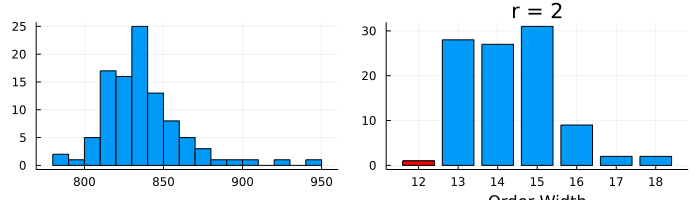

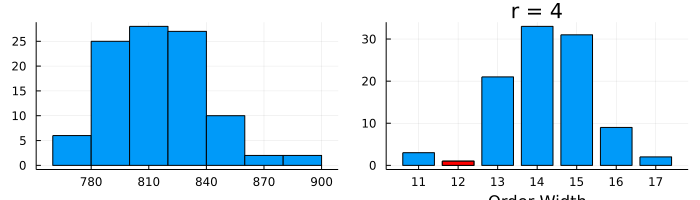

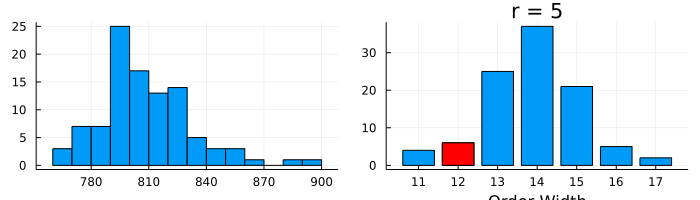

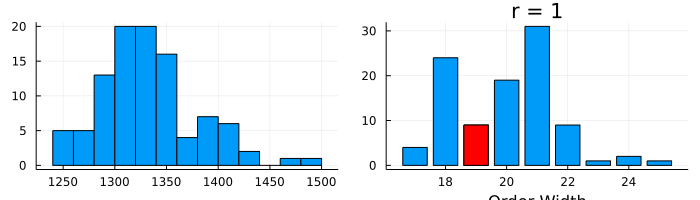

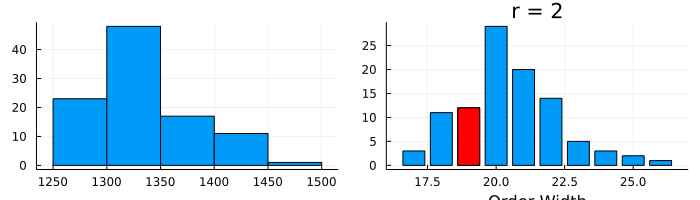

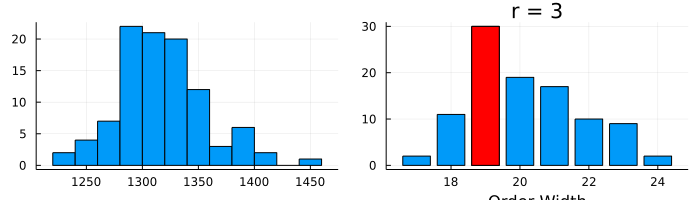

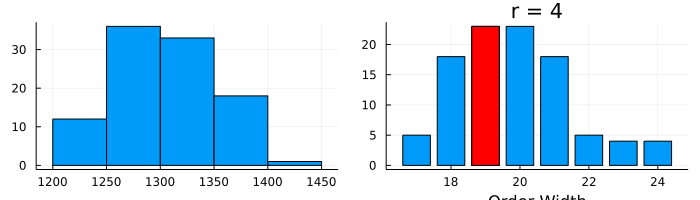

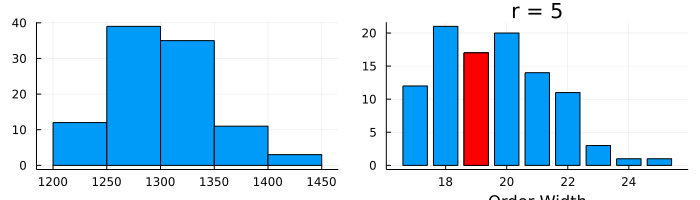

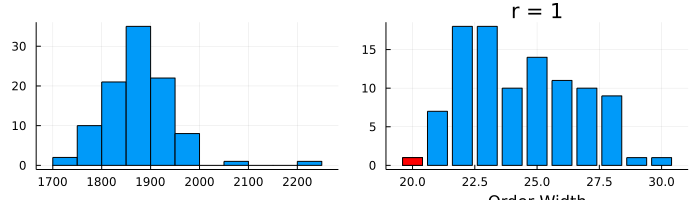

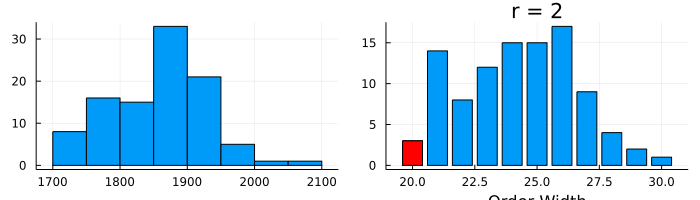

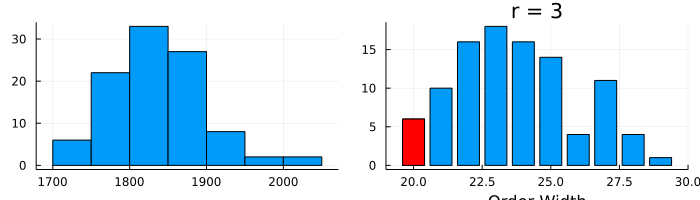

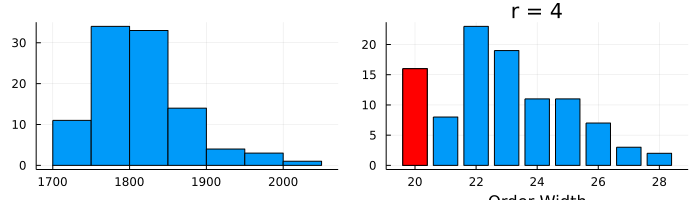

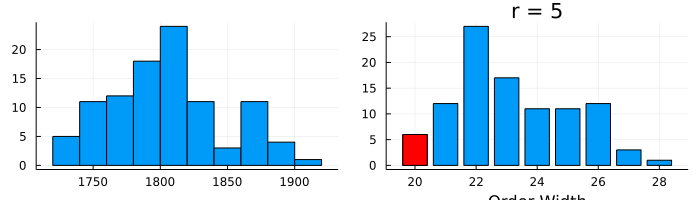

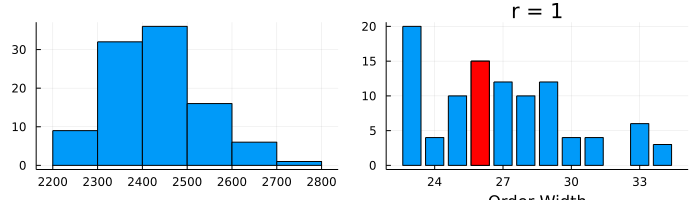

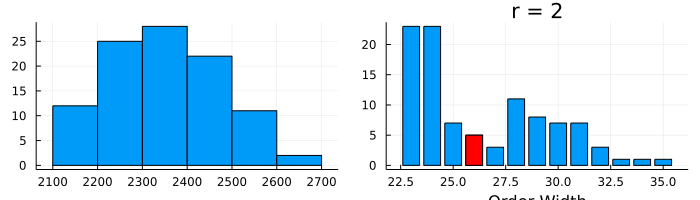

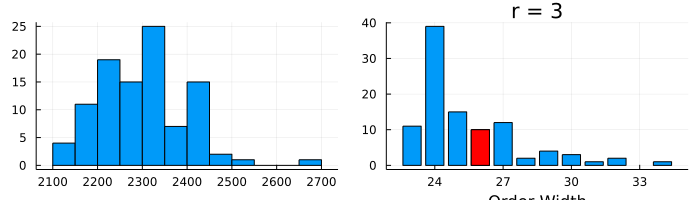

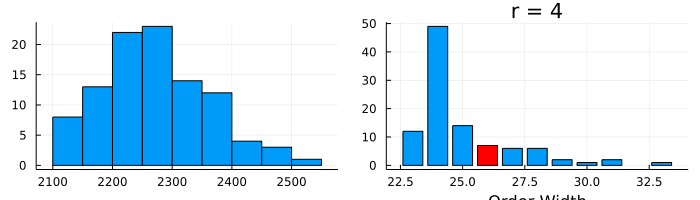

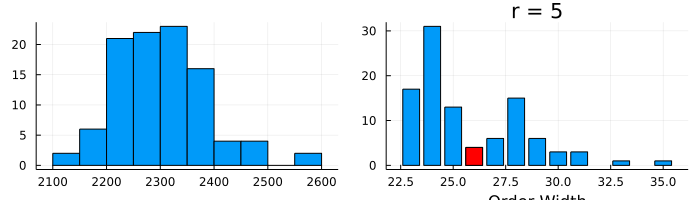

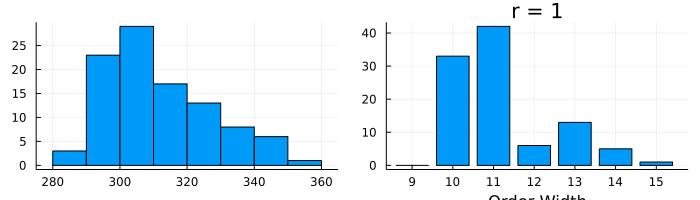

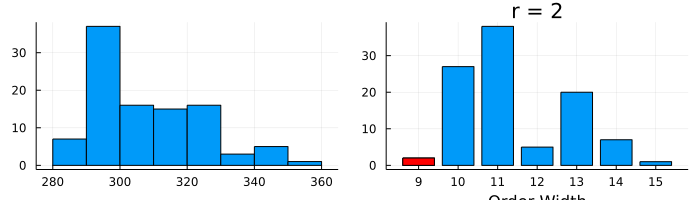

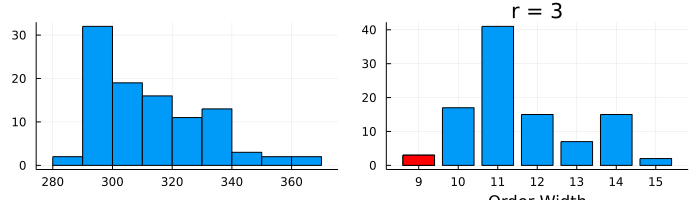

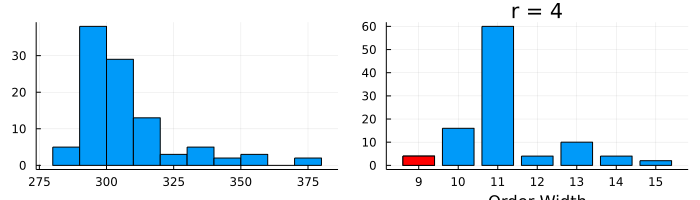

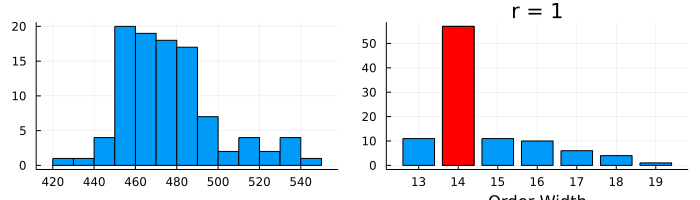

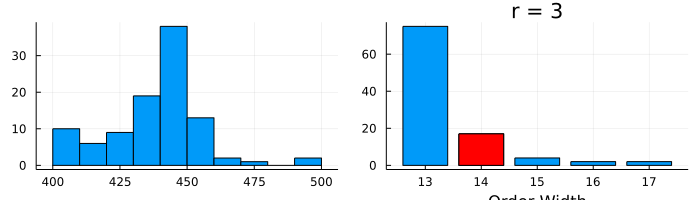

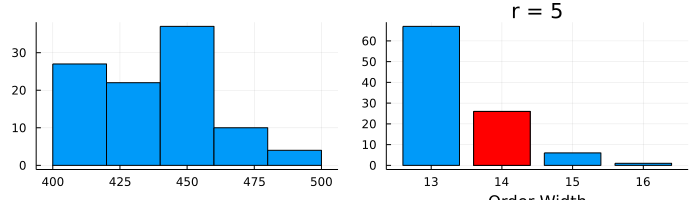

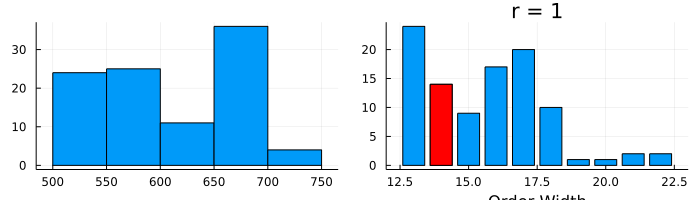

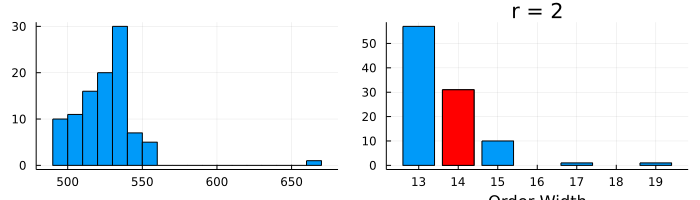

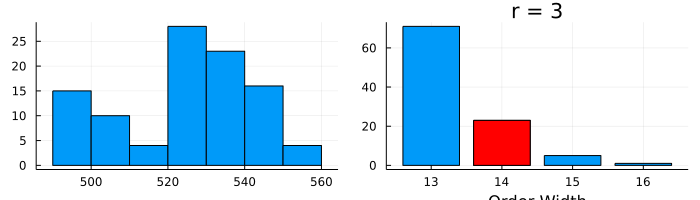

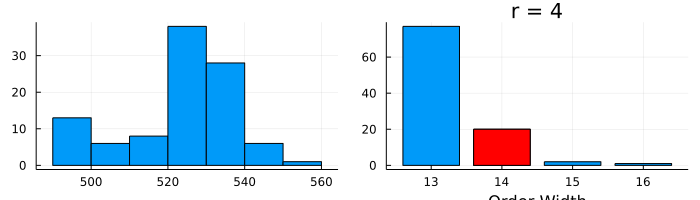

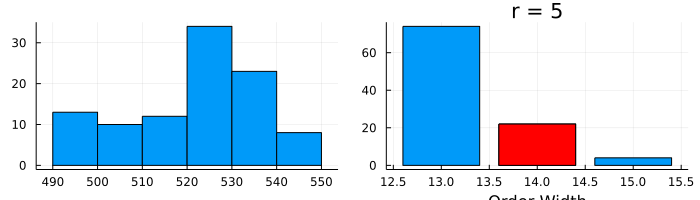

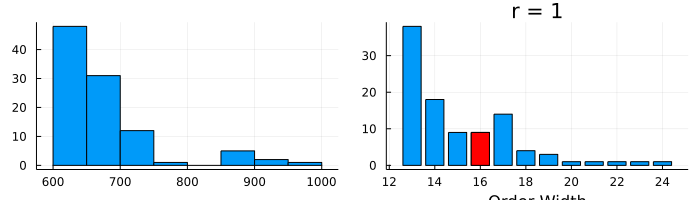

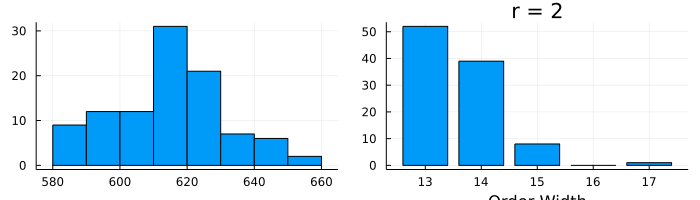

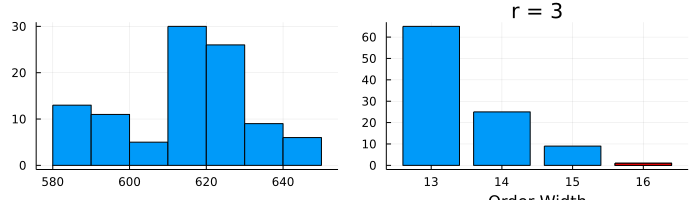

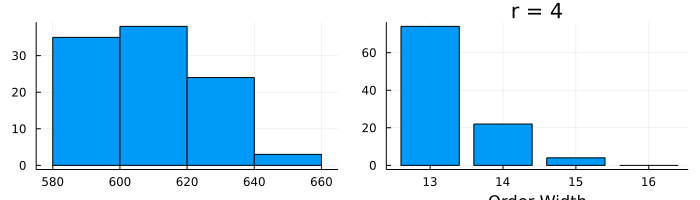

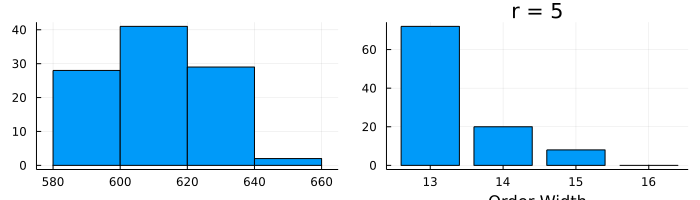

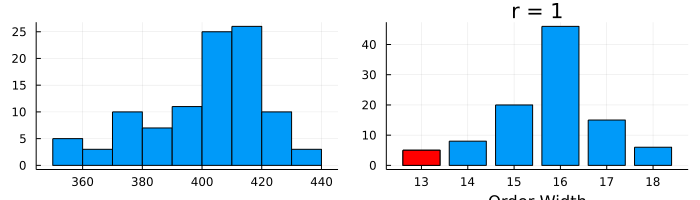

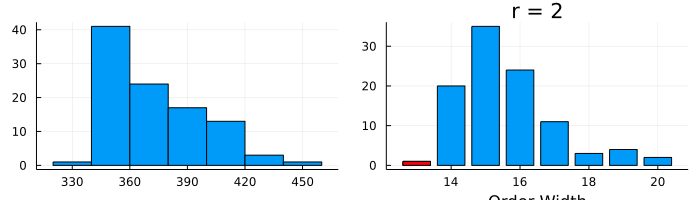

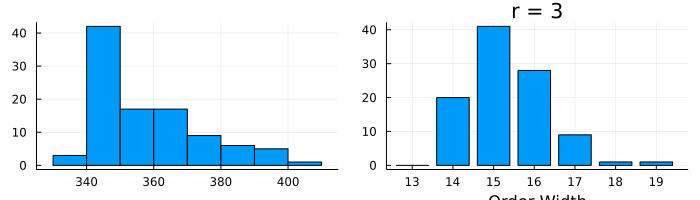

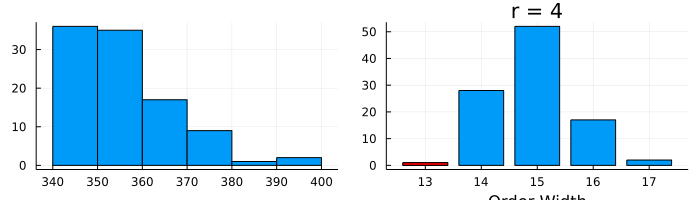

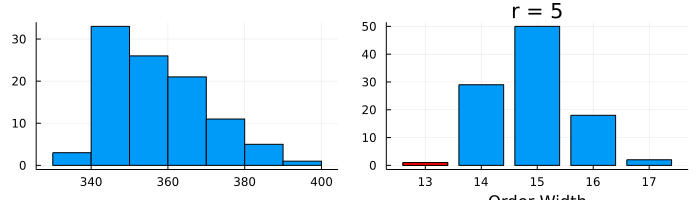

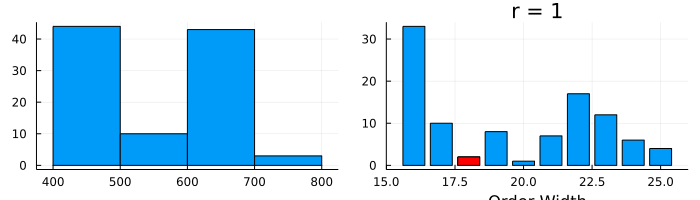

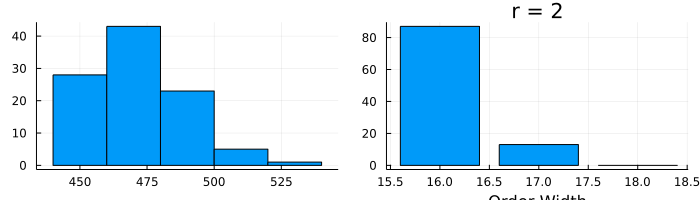

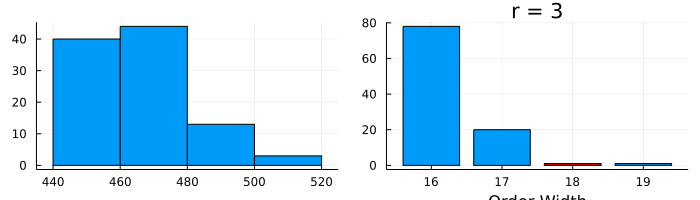

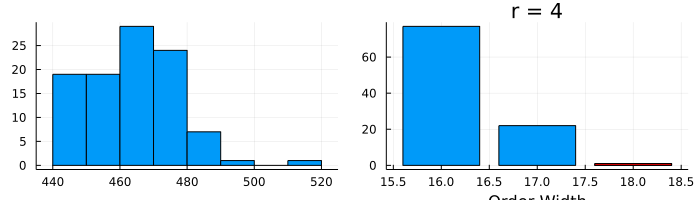

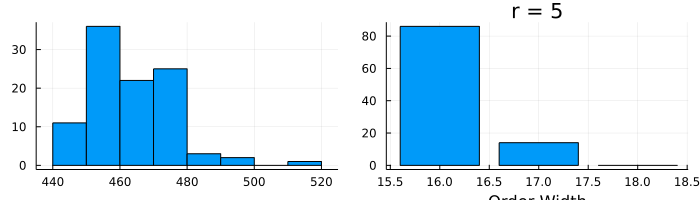

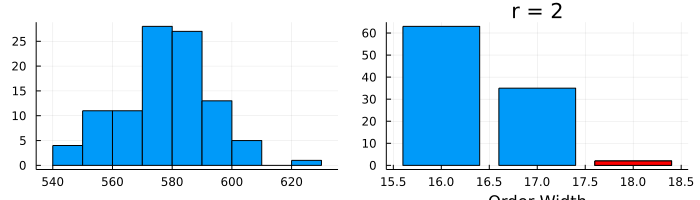

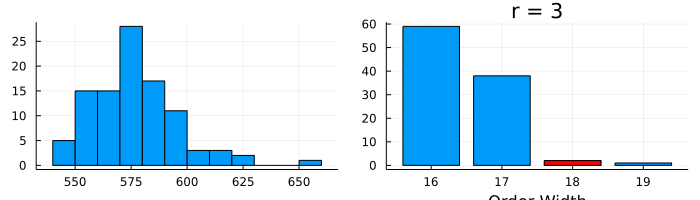

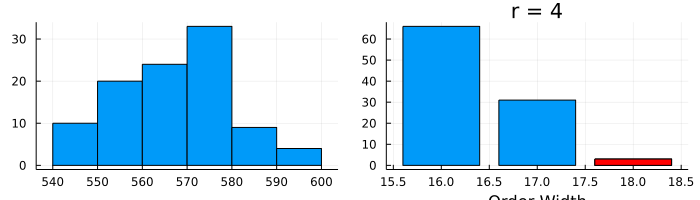

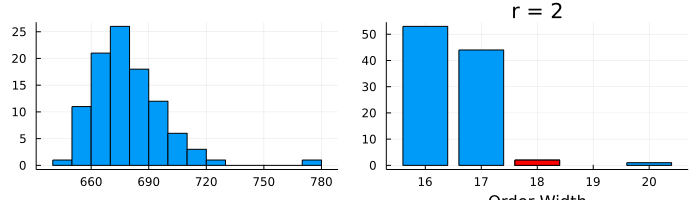

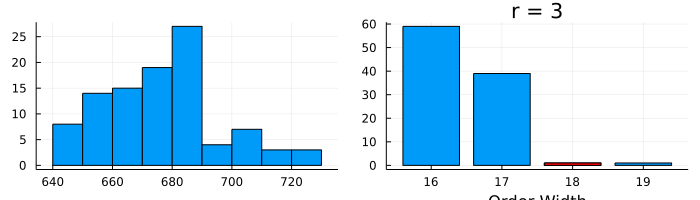

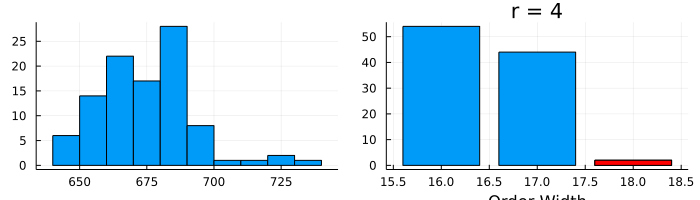

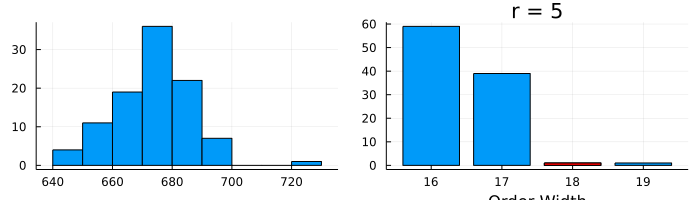

In [40]:
for subdf in groupby(df, [:Name, :Order])
    l = @layout [a b]
    p1 = @df subdf histogram(:OneSumVal, legend=false)
    p2 = @df subdf bar(
        unique(:TW), 
        [count(==(e), :TW) for e in unique(:TW)];
        legend = false, xlabel="One Sum Value"
    )
    @df subdf bar!(p2, 
        [minimum(:Flowcutter)], [count(==(minimum(:Flowcutter)), :TW)];
        color = :red, legend=false, xlabel = "Order Width", title="r = $(subdf.Order[1])"
    )
    display(plot(p1, p2; layout = l, size=(700, 200)))
end

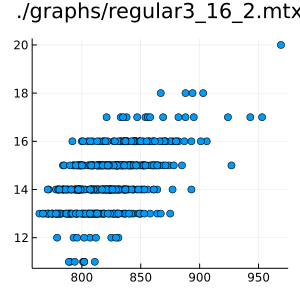

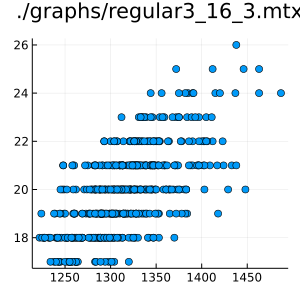

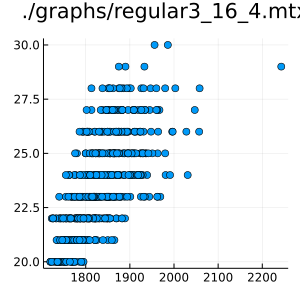

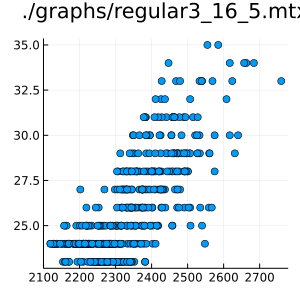

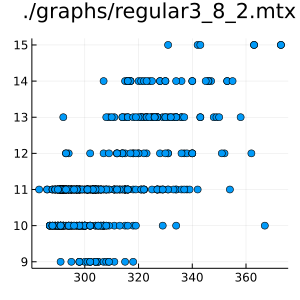

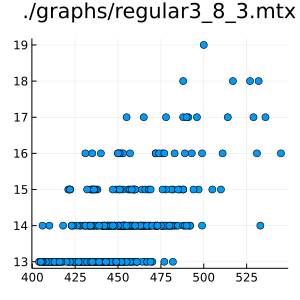

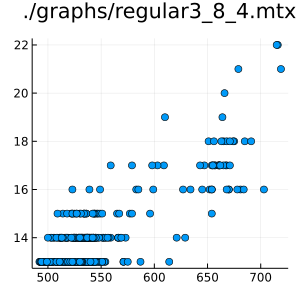

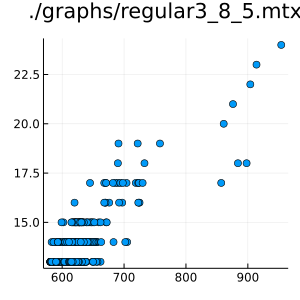

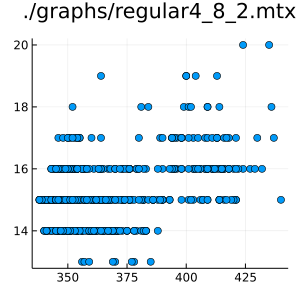

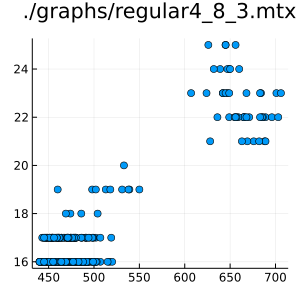

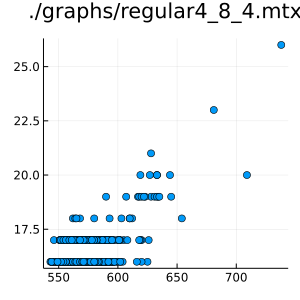

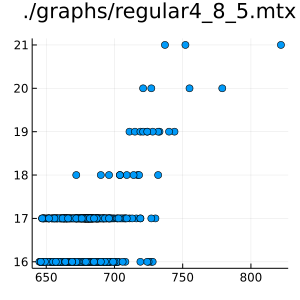

In [41]:
for subdf in gdf
    display(@df subdf scatter(:OneSumVal, :TW; size=(300, 300), legend=false, title=subdf.Name[1]))
end

In [20]:
function write_gr(filepath, graph)
    io = open(filepath, "w")
    write(io, "p tw $(nv(graph)) $(ne(graph))\n")
    for e in edges(graph)
        write(io, "$(e.src) $(e.dst)\n")
    end
    close(io)
end

write_gr (generic function with 1 method)

In [21]:
for (name, graph) in Iterators.zip(circuitfiles, circuits)
    path, _ = splitext(name)
    path = path * ".gr"
    line = linegraph(graph)
    write_gr(path, line)
end

In [80]:
tam_log = readlines("./tamaki_widths.log");

In [81]:
count(startswith.(tam_log, '/'))

123

In [23]:
using DataFrames

In [71]:
idx = 1
rows = []
parseint(s) = parse(Int, join(collect(Iterators.filter(isnumeric, s))))
while idx < length(tam_log)
    name = tam_log[idx]
    idx += 2
    while idx <= length(tam_log) && startswith(tam_log[idx], 'c')
        row = (name, parseint(tam_log[idx]), parseint(tam_log[idx+1]))
        push!(rows, row)
        idx += 2
    end
end
tamaki_df = DataFrame(rows);

In [27]:
getwidthsdf(df, s) = combine(groupby(filter(:3 => x -> x < s, df), :1), :2 => minimum)[!, Symbol("2_minimum")];

In [89]:
for v in tw5s
    println(v)
end

15
15
13
13
17
17
13
17
17
15
28
22
20
19
25
28
20
25
27
26
35
32
27
26
32
35
28
32
38
35
49
42
34
33
42
49
37
43
52
43
27
30
26
26
31
30
29
30
27
30
51
54
42
43
57
53
46
53
58
46
64
69
58
58
70
71
58
75
67
62
69
67
59
62
80
72
64
72
72
66
45
40
48
43
46
40
45
42
47
49
66
64
62
65
71
66
70
66
68
74
83
93
97
74
101
93
86
93
96
100
76


In [10]:
using TickTock

In [34]:
rowscost = []
@showprogress 1 "Graph..." for (name, G) in Iterators.zip(circuitfiles, circuits)
    bestcost = Inf
    tick()
    @showprogress 1 "Seed..." for i in 1:50
        config = (
            compat_sweeps=10,
            stride_percent=0.5,
            gauss_sweeps=10,
            coarsening=VolumeCoarsening(0.4, 2.0, 5),
            coarsest=10, 
            pad_percent=0.05, 
            node_window_sweeps=10,
            node_window_size=1,
            seed = i
        )
        position_to_idx, idx_to_position = ordergraph(onesum, G; config...);
        onesumval = LinearOrdering.evalorder(onesum, adjacency_matrix(G), idx_to_position)
        cost, _ = recursive_width(adjacency_matrix(G), position_to_idx, idx_to_position; flops=true)
        t = peektimer()
        if cost <= bestcost
            bestcost = cost
            push!(rowscost, (name, bestcost, t))
        end
        if t >= 10
            break
        end
    end    
    tok()
end

┌ Info:  started timer at: 2022-04-26T23:54:50.625
└ @ TickTock /home/cameron/.julia/packages/TickTock/fGILW/src/TickTock.jl:54
Seed...100%|████████████████████████████████████████████| Time: 0:00:10
┌ Info:  started timer at: 2022-04-26T23:55:00.984
└ @ TickTock /home/cameron/.julia/packages/TickTock/fGILW/src/TickTock.jl:54
Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph...  2%|▊                                          |  ETA: 0:20:06┌ Info:  started timer at: 2022-04-26T23:55:11.073
└ @ TickTock /home/cameron/.julia/packages/TickTock/fGILW/src/TickTock.jl:54
Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph...  2%|█▏                                         |  ETA: 0:19:51┌ Info:  started timer at: 2022-04-26T23:55:21.155
└ @ TickTock /home/cameron/.julia/packages/TickTock/fGILW/src/TickTock.jl:54
Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph...  3%|█▍                                         | 

Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph... 24%|██████████▍                                |  ETA: 0:15:37┌ Info:  started timer at: 2022-04-26T23:59:49.267
└ @ TickTock /home/cameron/.julia/packages/TickTock/fGILW/src/TickTock.jl:54
Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph... 25%|██████████▊                                |  ETA: 0:15:28┌ Info:  started timer at: 2022-04-26T23:59:59.826
└ @ TickTock /home/cameron/.julia/packages/TickTock/fGILW/src/TickTock.jl:54
Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph... 26%|███████████▏                               |  ETA: 0:15:18┌ Info:  started timer at: 2022-04-27T00:00:10.362
└ @ TickTock /home/cameron/.julia/packages/TickTock/fGILW/src/TickTock.jl:54
Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph... 27%|███████████▌                               |  ETA: 0:15:09┌ Info:  started timer at: 2022-04-27T00:00:

Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph... 48%|████████████████████▍                      |  ETA: 0:10:50┌ Info:  started timer at: 2022-04-27T00:04:38.988
└ @ TickTock /home/cameron/.julia/packages/TickTock/fGILW/src/TickTock.jl:54
Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph... 48%|████████████████████▊                      |  ETA: 0:10:40┌ Info:  started timer at: 2022-04-27T00:04:49.352
└ @ TickTock /home/cameron/.julia/packages/TickTock/fGILW/src/TickTock.jl:54
Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph... 49%|█████████████████████▏                     |  ETA: 0:10:30┌ Info:  started timer at: 2022-04-27T00:04:59.491
└ @ TickTock /home/cameron/.julia/packages/TickTock/fGILW/src/TickTock.jl:54
Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph... 50%|█████████████████████▌                     |  ETA: 0:10:19┌ Info:  started timer at: 2022-04-27T00:05:

Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph... 71%|██████████████████████████████▌            |  ETA: 0:06:04┌ Info:  started timer at: 2022-04-27T00:09:34.396
└ @ TickTock /home/cameron/.julia/packages/TickTock/fGILW/src/TickTock.jl:54
Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph... 72%|██████████████████████████████▉            |  ETA: 0:05:53┌ Info:  started timer at: 2022-04-27T00:09:44.619
└ @ TickTock /home/cameron/.julia/packages/TickTock/fGILW/src/TickTock.jl:54
Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph... 72%|███████████████████████████████▏           |  ETA: 0:05:43┌ Info:  started timer at: 2022-04-27T00:09:54.855
└ @ TickTock /home/cameron/.julia/packages/TickTock/fGILW/src/TickTock.jl:54
Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph... 73%|███████████████████████████████▌           |  ETA: 0:05:33┌ Info:  started timer at: 2022-04-27T00:10:

Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph... 94%|████████████████████████████████████████▌  |  ETA: 0:01:13┌ Info:  started timer at: 2022-04-27T00:14:26.140
└ @ TickTock /home/cameron/.julia/packages/TickTock/fGILW/src/TickTock.jl:54
Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph... 95%|████████████████████████████████████████▉  |  ETA: 0:01:02┌ Info:  started timer at: 2022-04-27T00:14:36.475
└ @ TickTock /home/cameron/.julia/packages/TickTock/fGILW/src/TickTock.jl:54
Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph... 96%|█████████████████████████████████████████▎ |  ETA: 0:00:52┌ Info:  started timer at: 2022-04-27T00:14:46.503
└ @ TickTock /home/cameron/.julia/packages/TickTock/fGILW/src/TickTock.jl:54
Seed...100%|████████████████████████████████████████████| Time: 0:00:10
Graph... 97%|█████████████████████████████████████████▋ |  ETA: 0:00:42┌ Info:  started timer at: 2022-04-27T00:14:

In [12]:
using DataFrames

In [35]:
order_df = DataFrame(rowscost)

407×3 DataFrame
 Row │ 1                             2                3         
     │ String                        Float64          Float64   
─────┼──────────────────────────────────────────────────────────
   1 │ ./graphs/regular3_32_2_0.mtx       2.87058e6    0.531682
   2 │ ./graphs/regular3_32_2_0.mtx       1.34385e6    1.21435
   3 │ ./graphs/regular3_32_2_0.mtx  956266.0          1.62148
   4 │ ./graphs/regular3_32_2_0.mtx  694026.0          2.25369
   5 │ ./graphs/regular3_32_2_0.mtx  546954.0          4.17202
   6 │ ./graphs/regular3_32_2_1.mtx  301478.0          0.333307
   7 │ ./graphs/regular3_32_2_1.mtx  282442.0          5.999
   8 │ ./graphs/regular3_32_2_1.mtx  237642.0          8.81484
   9 │ ./graphs/regular3_32_2_2.mtx  316778.0          0.592211
  10 │ ./graphs/regular3_32_2_2.mtx  310342.0          0.944122
  11 │ ./graphs/regular3_32_2_2.mtx  286514.0          1.58679
  ⋮  │              ⋮                       ⋮             ⋮
 398 │ ./graphs/regular5_32_5_7.mtx       2.53332e18   4.95871
 399 │ ./graphs/regular5_32_5_7.mtx       2.07013e18   6.19436
 400 │ ./graphs/regular5_32_5_8.mtx       7.95366e18   1.25568
 401 │ ./graphs/regular5_32_5_8.mtx       4.59659e18   2.49651
 402 │ ./graphs/regular5_32_5_8.mtx       3.77989e18   7.78638
 403 │ ./graphs/regular5_32_5_8.mtx       2.98272e18  10.3302
 404 │ ./graphs/regular5_32_5_9.mtx       4.09872e19   1.20625
 405 │ ./graphs/regular5_32_5_9.mtx       1.0671e19    2.3852
 406 │ ./graphs/regular5_32_5_9.mtx       6.90295e18   3.58524
 407 │ ./graphs/regular5_32_5_9.mtx       4.87291e18   9.8405
                                                386 rows omitted

In [37]:
order_df = DataFrame(rowscw)

2088×3 DataFrame
  Row │ 1                             2      3         
      │ String                        Int64  Float64   
──────┼────────────────────────────────────────────────
    1 │ ./graphs/regular3_32_2_0.mtx     16    505.821
    2 │ ./graphs/regular3_32_2_0.mtx     14   1273.09
    3 │ ./graphs/regular3_32_2_0.mtx     13   2130.85
    4 │ ./graphs/regular3_32_2_0.mtx     13   2839.37
    5 │ ./graphs/regular3_32_2_0.mtx     13   3310.04
    6 │ ./graphs/regular3_32_2_0.mtx     12   4734.88
    7 │ ./graphs/regular3_32_2_0.mtx     12   5227.08
    8 │ ./graphs/regular3_32_2_0.mtx     12   7879.11
    9 │ ./graphs/regular3_32_2_0.mtx     12  10543.3
   10 │ ./graphs/regular3_32_2_0.mtx     12  13050.6
   11 │ ./graphs/regular3_32_2_0.mtx     12  15208.4
  ⋮   │              ⋮                  ⋮        ⋮
 2079 │ ./graphs/regular5_32_5_8.mtx     51   3495.02
 2080 │ ./graphs/regular5_32_5_8.mtx     51   8715.01
 2081 │ ./graphs/regular5_32_5_8.mtx     51  12336.4
 2082 │ ./graphs/regular5_32_5_8.mtx     51  16106.2
 2083 │ ./graphs/regular5_32_5_8.mtx     50  19310.6
 2084 │ ./graphs/regular5_32_5_8.mtx     50  67924.6
 2085 │ ./graphs/regular5_32_5_9.mtx     53   2075.74
 2086 │ ./graphs/regular5_32_5_9.mtx     52   4010.9
 2087 │ ./graphs/regular5_32_5_9.mtx     52  12877.9
 2088 │ ./graphs/regular5_32_5_9.mtx     51  14557.9
                                      2067 rows omitted

In [36]:
for v in getwidthsdf(order_df, 10)
    println(v)
end

546954.0
237642.0
203750.0
150038.0
735070.0
777074.0
142954.0
659222.0
1.109362e6
429290.0
1.12576946e8
3.2384642e7
1.7162706e7
9.684838e6
2.5111069e8
2.4146093e8
1.176283e7
8.3745474e7
5.01787962e8
8.207485e7
2.3610888414e10
2.815826478e9
2.08359937e9
6.08538774e8
8.4543248898e10
5.218491919e10
1.104321182e9
2.1599590726e10
1.85511185478e11
1.2741744242e10
1.962117342206e12
1.82369229222e11
7.736147835e10
1.3892144014e10
9.1844932490226e13
1.0084229654622e13
9.2148579638e10
6.508627671354e12
6.3065983771977e14
2.19049377103e12
3.620007586e9
3.795594166e9
1.908864498e9
2.236792382e9
3.601323231e10
2.303573566e9
3.530895674e9
1.5651935886e10
3.821230522e9
4.593103786e9
5.142767581837e13
4.3569486997514e13
2.2406844422118e13
3.6585563556034e13
2.815857939539382e15
2.9093299977078e13
8.9133818602962e13
4.3086513834773e14
7.0954962749714e13
7.4140781635218e13
5.821782611335474e15
5.44431862669659e15
3.958052772092954e15
3.886526647403354e15
1.2859704039088426e16
3.300104156014282e15
6.124

In [16]:
path = [(116, 141),
 (176, 190),
 (50, 84),
 (18, 188),
 (186, 187),
 (49, 76),
 (18, 185),
 (104, 133),
 (168, 183),
 (181, 182),
 (180, 181),
 (52, 88),
 (22, 179),
 (115, 124),
 (167, 177),
 (175, 176),
 (94, 130),
 (157, 174),
 (43, 65),
 (14, 172),
 (170, 171),
 (169, 170),
 (168, 169),
 (41, 57),
 (13, 167),
 (47, 54),
 (20, 165),
 (163, 164),
 (39, 77),
 (13, 162),
 (160, 161),
 (102, 116),
 (143, 159),
 (76, 115),
 (140, 157),
 (155, 156),
 (75, 107),
 (144, 154),
 (152, 153),
 (151, 152),
 (150, 151),
 (99, 120),
 (127, 149),
 (82, 102),
 (141, 147),
 (145, 146),
 (46, 57),
 (21, 144),
 (28, 71),
 (4, 142),
 (140, 141),
 (139, 140),
 (138, 139),
 (31, 68),
 (8, 137),
 (24, 46),
 (2, 135),
 (133, 134),
 (65, 106),
 (109, 132),
 (84, 99),
 (112, 130),
 (128, 129),
 (127, 128),
 (126, 127),
 (65, 103),
 (104, 125),
 (22, 44),
 (1, 123),
 (121, 122),
 (120, 121),
 (73, 97),
 (100, 119),
 (64, 95),
 (98, 117),
 (115, 116),
 (22, 53),
 (2, 114),
 (21, 42),
 (2, 112),
 (110, 111),
 (109, 110),
 (108, 109),
 (28, 43),
 (10, 107),
 (20, 41),
 (3, 105),
 (103, 104),
 (19, 38),
 (3, 102),
 (51, 76),
 (83, 100),
 (98, 99),
 (97, 98),
 (51, 69),
 (86, 96),
 (51, 73),
 (78, 94),
 (92, 93),
 (91, 92),
 (51, 74),
 (73, 90),
 (0, 15),
 (34, 88),
 (86, 87),
 (85, 86),
 (46, 57),
 (80, 84),
 (26, 32),
 (12, 82),
 (80, 81),
 (48, 63),
 (64, 79),
 (14, 35),
 (1, 77),
 (75, 76),
 (74, 75),
 (13, 24),
 (1, 73),
 (71, 72),
 (44, 54),
 (57, 70),
 (33, 53),
 (54, 68),
 (66, 67),
 (65, 66),
 (64, 65),
 (12, 32),
 (1, 63),
 (11, 29),
 (1, 61),
 (59, 60),
 (36, 45),
 (46, 58),
 (56, 57),
 (55, 56),
 (54, 55),
 (15, 24),
 (6, 53),
 (30, 35),
 (46, 51),
 (49, 50),
 (30, 34),
 (43, 48),
 (13, 22),
 (5, 46),
 (44, 45),
 (43, 44),
 (42, 43),
 (11, 15),
 (4, 41),
 (7, 12),
 (1, 39),
 (37, 38),
 (5, 14),
 (0, 36),
 (4, 8),
 (0, 34),
 (32, 33),
 (31, 32),
 (10, 18),
 (25, 30),
 (14, 20),
 (19, 28),
 (26, 27),
 (10, 17),
 (18, 25),
 (9, 16),
 (15, 23),
 (21, 22),
 (20, 21),
 (19, 20),
 (18, 19),
 (11, 14),
 (13, 17),
 (9, 11),
 (12, 15),
 (13, 14),
 (5, 6),
 (2, 12),
 (2, 5),
 (0, 10),
 (8, 9),
 (7, 8),
 (6, 7),
 (3, 4),
 (3, 5),
 (1, 2),
 (0, 3),
 (1, 2),
 (0, 1)];